<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter5/confpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Example 5.7
## Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from  numpy.linalg import inv, lstsq, norm
print(np.__version__)

1.19.5


## Set random seed

In [3]:
np.random.seed(123)

## Original program

[ 6.02558346 13.05670234]
1.5097450108508206


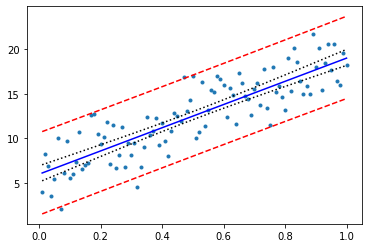

In [4]:
n = 100
x = np.linspace(0.01,1,100).reshape((n,1))
# parameters
beta = np.array([6,13])
sigma = 2
Xmat = np.hstack((np.ones((n,1)), x)) #design matrix
y = Xmat @ beta + sigma*np.random.randn(n) 

# solve the normal equations
betahat = lstsq(Xmat, y,rcond=None)[0] 
# estimate for sigma
sqMSE = norm(y - Xmat @ betahat)/np.sqrt(n-2) 

tquant = t.ppf(0.975,n-2) # 0.975 quantile 
#upper/lower conf. limits
ucl = np.zeros(n)
lcl = np.zeros(n)  
upl = np.zeros(n)  
lpl = np.zeros(n)  
rl = np.zeros(n)  # (true) regression line
u = 0

for i in range(n):
    u = u + 1/n;
    xvec = np.array([1,u])
    sqc = np.sqrt(xvec.T @ inv(Xmat.T @ Xmat) @ xvec)
    sqp = np.sqrt(1 + xvec.T @ inv(Xmat.T @ Xmat) @ xvec)
    rl[i] = xvec.T @ beta;
    ucl[i] = xvec.T @ betahat + tquant*sqMSE*sqc;
    lcl[i] = xvec.T @ betahat - tquant*sqMSE*sqc;  
    upl[i] = xvec.T @ betahat + tquant*sqMSE*sqp;
    lpl[i] = xvec.T @ betahat - tquant*sqMSE*sqp;

plt.plot(x,y, '.')
plt.plot(x,rl,'b')
plt.plot(x,ucl,'k:')
plt.plot(x,lcl,'k:')
plt.plot(x,upl,'r--')
plt.plot(x,lpl,'r--') 

print(betahat)
print(np.sqrt(sqMSE))